In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install necessary packages (if not already installed)
!pip install polars plotnine geopandas

# Import packages
import polars as pl
from plotnine import *
import geopandas as gpd

# Upload the files
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
df_data = pl.read_csv("unicef_indicator_1.csv", infer_schema_length=10000, ignore_errors=True)
df_meta = pl.read_csv("unicef_metadata.csv", infer_schema_length=10000)


df_data.head()
df_meta.head()

country,alpha_2_code,alpha_3_code,numeric_code,year,"Population, total",GDP per capita (constant 2015 US$),GNI (current US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),Fossil fuel energy consumption (% of total),GDP growth (annual %),"Birth rate, crude (per 1,000 people)","Hospital beds (per 1,000 people)"
str,str,str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Afghanistan""","""AF""","""AFG""",4,1960,9.035043e6,null,5.4889e8,null,32.535,null,null,null,50.34,0.170627
"""Afghanistan""","""AF""","""AFG""",4,1961,9.214083e6,null,5.6000e8,null,33.068,null,null,null,50.443,null
"""Afghanistan""","""AF""","""AFG""",4,1962,9.404406e6,null,5.5778e8,null,33.547,null,null,null,50.57,null
"""Afghanistan""","""AF""","""AFG""",4,1963,9.604487e6,null,7.6667e8,null,34.016,null,null,null,50.703,null
"""Afghanistan""","""AF""","""AFG""",4,1964,9.814318e6,null,8.1556e8,null,34.494,null,null,null,50.831,null


In [ ]:
df_meta.columns


['country',
 'alpha_2_code',
 'alpha_3_code',
 'numeric_code',
 'year',
 'Population, total',
 'GDP per capita (constant 2015 US$)',
 'GNI (current US$)',
 'Inflation, consumer prices (annual %)',
 'Life expectancy at birth, total (years)',
 'Military expenditure (% of GDP)',
 'Fossil fuel energy consumption (% of total)',
 'GDP growth (annual %)',
 'Birth rate, crude (per 1,000 people)',
 'Hospital beds (per 1,000 people)']

In [ ]:
# Select needed columns and drop rows with missing values
df_clean = (df_meta
  .select([
      "country",
      "year",
      "GDP per capita (constant 2015 US$)",
      "Life expectancy at birth, total (years)",
      "Population, total"
  ])
  .drop_nulls()
)
df_clean.head()


country,year,GDP per capita (constant 2015 US$),"Life expectancy at birth, total (years)","Population, total"
str,i64,f64,f64,f64
"""Afghanistan""",2000,308.31827,55.298,2.0130327e7
"""Afghanistan""",2001,277.118051,55.798,2.0284307e7
"""Afghanistan""",2002,338.139974,56.454,2.1378117e7
"""Afghanistan""",2003,346.071627,57.344,2.2733049e7
"""Afghanistan""",2004,338.637274,57.944,2.3560654e7


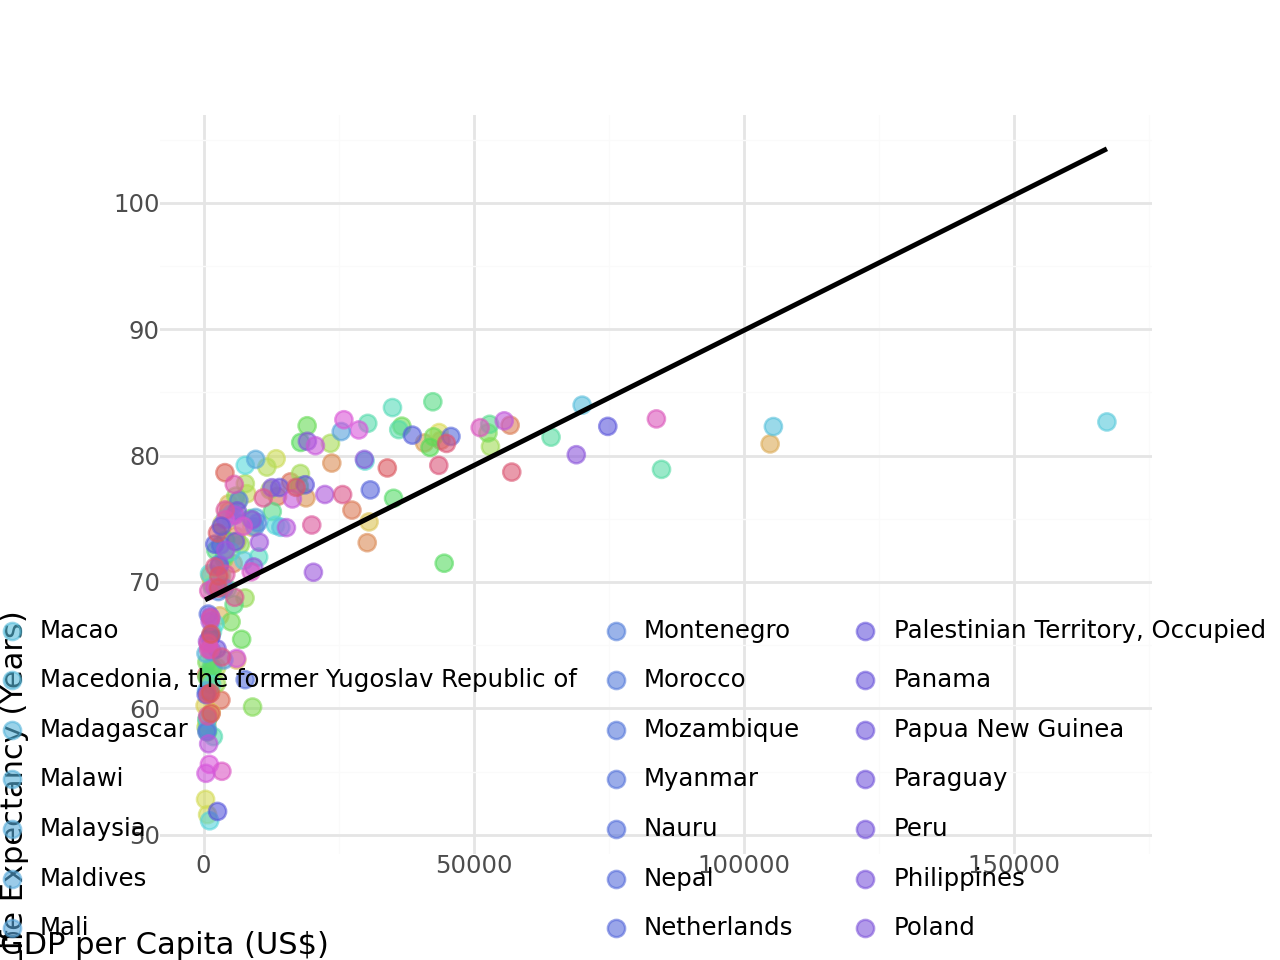

In [ ]:
from plotnine import *

(
  ggplot(df_clean.to_pandas().query("year == 2015")) +
  aes(
      x='GDP per capita (constant 2015 US$)', # Changed to single quotes
      y='Life expectancy at birth, total (years)', # Changed to single quotes
      color='country' # Changed to single quotes
  ) +
  geom_point(alpha=0.6, size=3) +
  geom_smooth(method='lm', se=False, color="black") +
  theme_minimal() +
  labs(
      title="GDP per Capita vs Life Expectancy (2015)",
      x="GDP per Capita (US$)",
      y="Life Expectancy (Years)"
  )
)

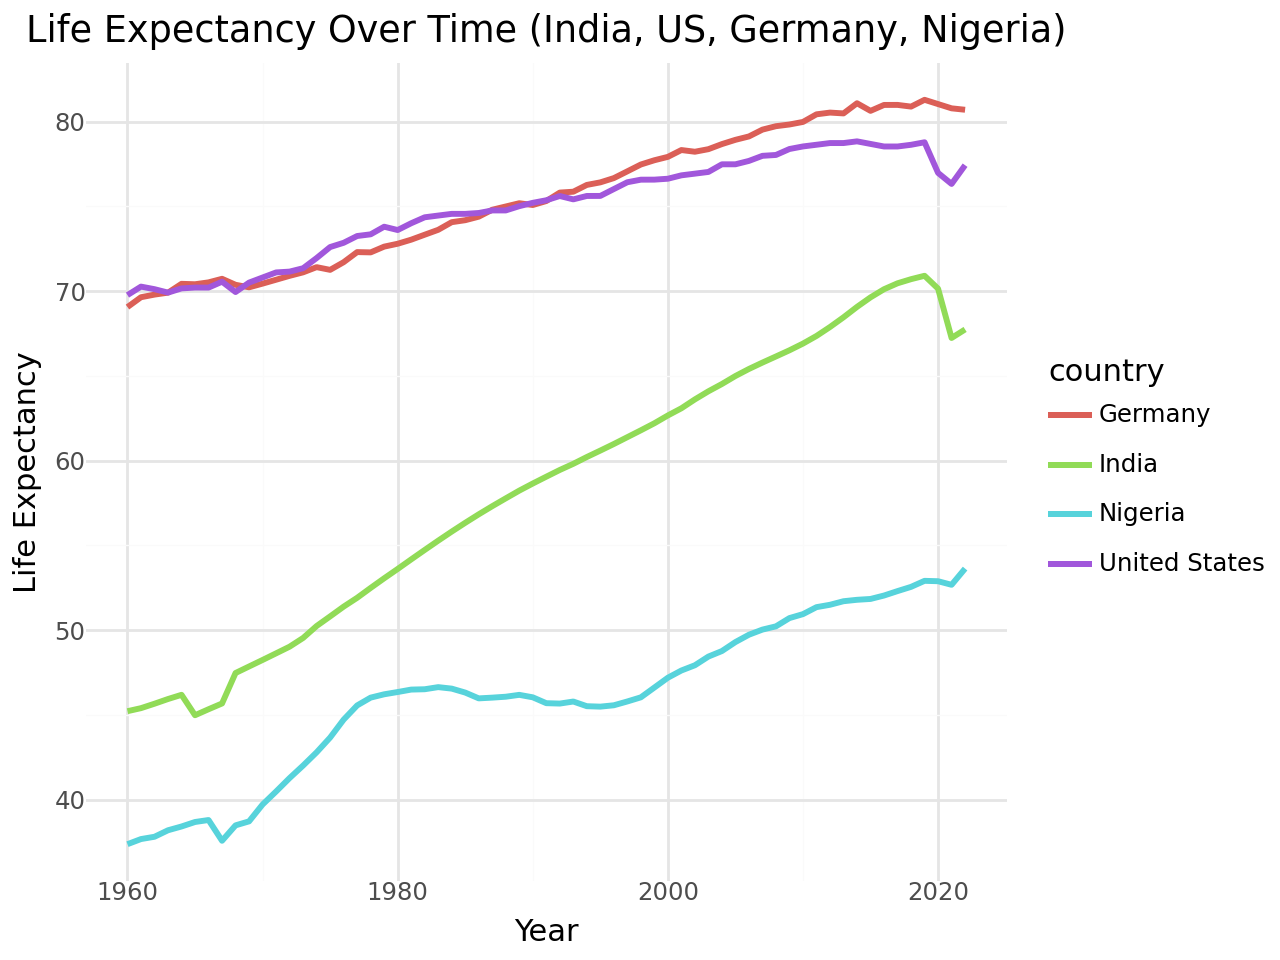

In [ ]:
aes(x="year", y=df_subset.to_pandas()["Life expectancy at birth, total (years)"], color="country")

df_subset = df_subset.rename({"Life expectancy at birth, total (years)": "life_expectancy"})
(
  ggplot(df_subset.to_pandas()) +
  aes(x="year", y="life_expectancy", color="country") + #Use the new column name
  geom_line(size=1.2) +
  theme_minimal() +
  labs(
      title="Life Expectancy Over Time (India, US, Germany, Nigeria)",
      x="Year",
      y="Life Expectancy"
  )
)


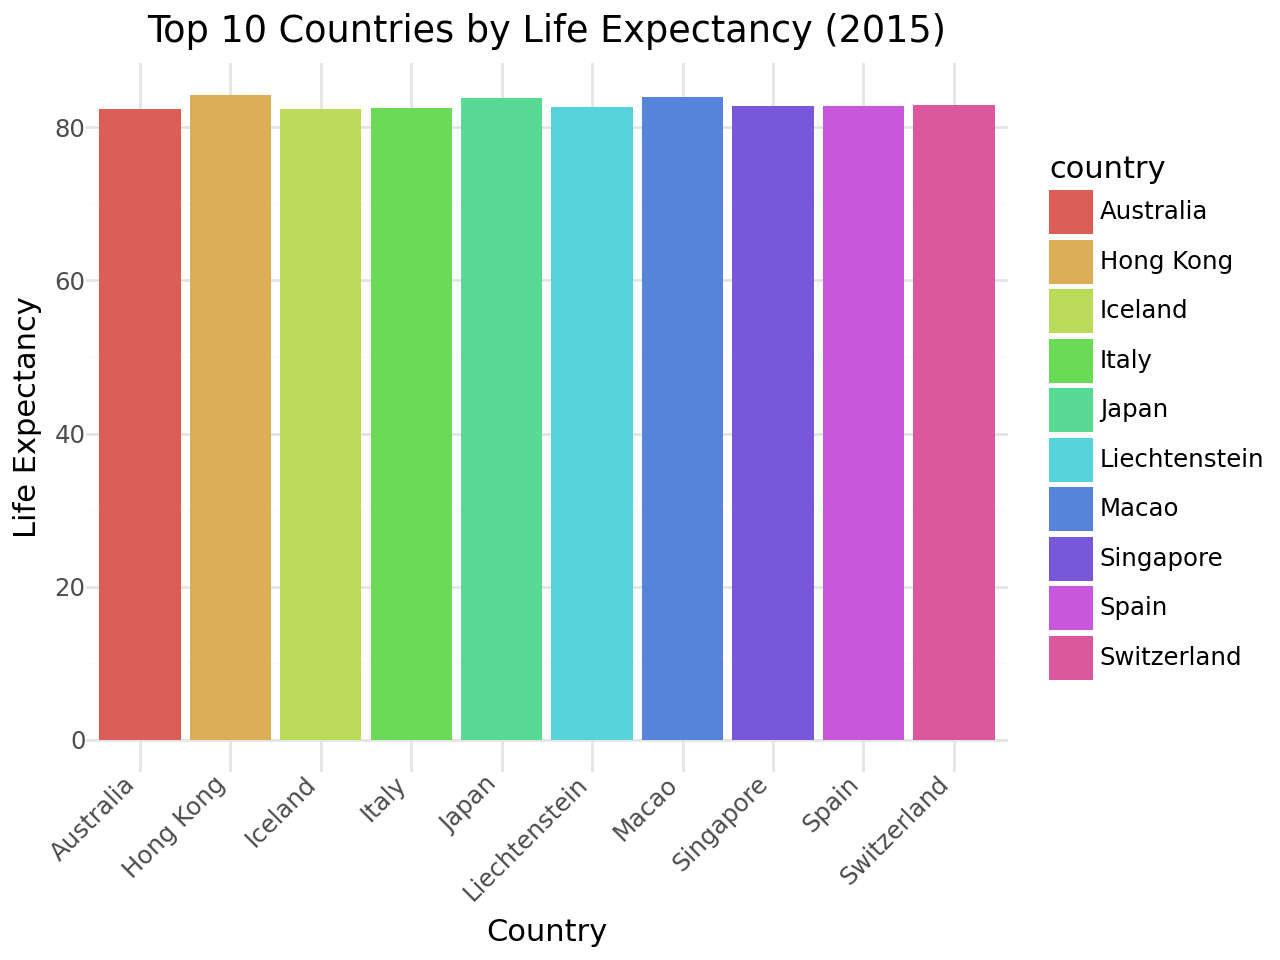

In [ ]:
top10 = (
    df_clean.filter(pl.col("year") == 2015)
    .sort("Life expectancy at birth, total (years)", descending=True)
    .head(10)
)

(
  ggplot(top10.to_pandas()) +
  aes(x="country", y="Life expectancy at birth, total (years)", fill="country") + # Removed backticks from column name
  geom_col() +
  theme_minimal() +
  labs(
      title="Top 10 Countries by Life Expectancy (2015)",
      x="Country",
      y="Life Expectancy"
  ) +
  theme(axis_text_x=element_text(rotation=45, ha="right"))
)

In [ ]:
!pip install geopandas

import geopandas as gpd


In [ ]:
shape_world = gpd.read_file("https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp")


In [ ]:
# Filter 2015 data
lifeexp_2015 = (
    df_clean.filter(pl.col("year") == 2015)
    .to_pandas()
)

# Merge with map
map_data = shape_world.merge(lifeexp_2015, how="left", left_on="name", right_on="country")


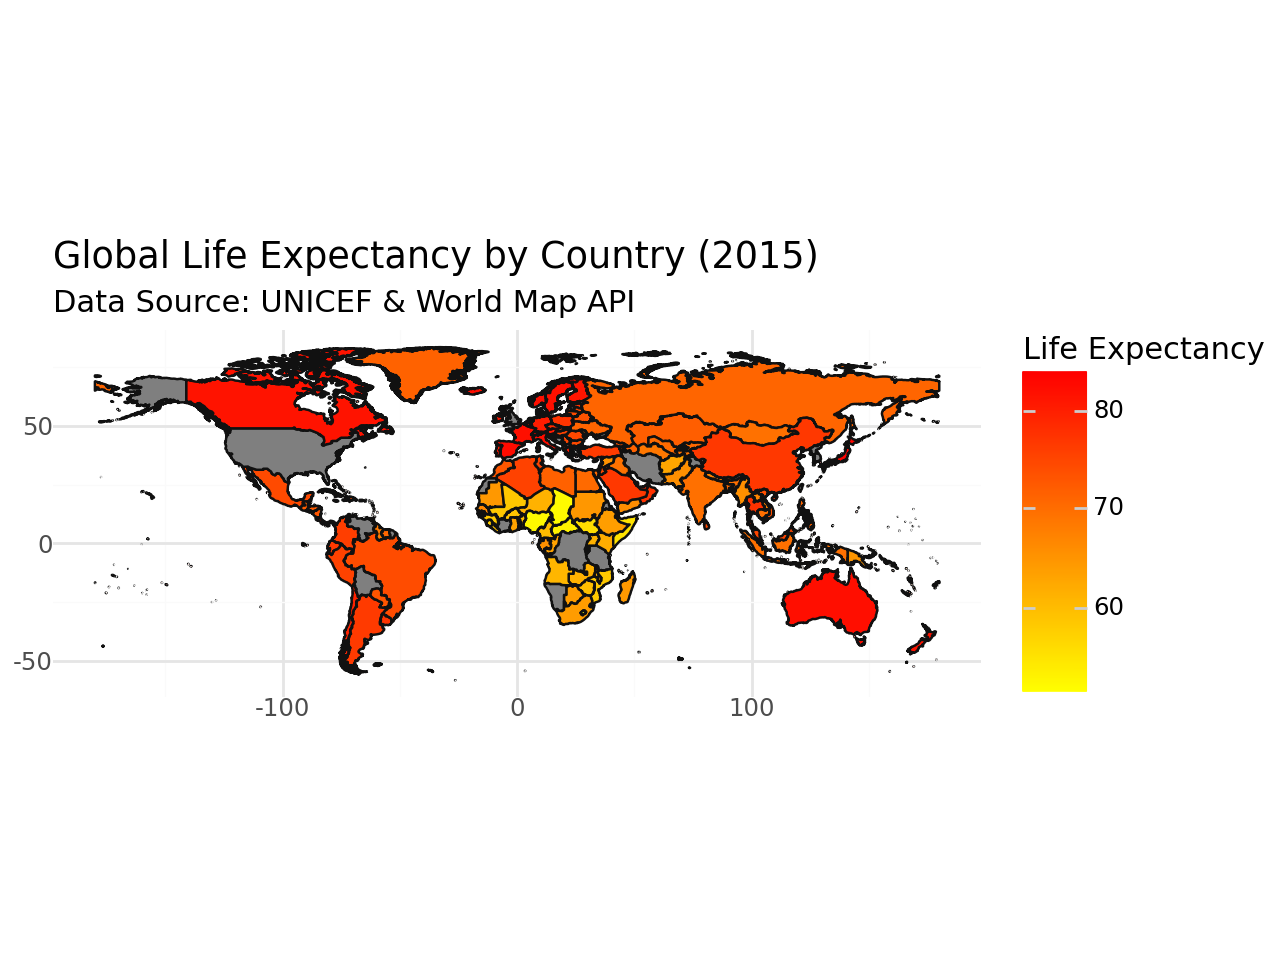

In [ ]:
from plotnine import *

(
  ggplot(map_data) +
  aes(fill="Life expectancy at birth, total (years)") + # Removed backticks around column name
  geom_map() +
  coord_fixed() +
  scale_fill_gradient(low="yellow", high="red") +
  labs(
      title="Global Life Expectancy by Country (2015)",
      subtitle="Data Source: UNICEF & World Map API",
      fill="Life Expectancy"
  ) +
  theme_minimal()
)
